# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', matplotlib.__version__)
print('Seaborn', sns.__version__)

NumPy 1.21.5
Pandas 1.4.4
Matplotlib 3.5.2
Seaborn 0.11.2


In [3]:
# Ignore warning
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Pandas show all column
pd.set_option('display.max_columns', 50)

# Load Dataset

In [5]:
df_raw = pd.read_csv('flight.csv')

In [6]:
df = df_raw.copy()

In [7]:
df.shape

(62988, 23)

# Exploratory Data Analysis

## Descriptive Statistics

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

- Dataframe memiliki total 62988 baris dan 23 kolom
- Dataframe masih memiliki beberapa missing values di beberapa kolom seperti : `GENDER`, `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, `AGE`, `SUM_YR_1`, `SUM_YR_2`
- Kolom `AGE` seharusnya ber tipe data **int64**
- Kolom `FFP_DATE`,`FIRST_FLIGHT_DATE`, `LOAD_TIME`, `LAST_FLIGHT_DATE` seharusnya ber tipe data **datetime**

### Sampling untuk memahami data

In [9]:
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
60444,48013,1/13/2008,5/9/2012,Male,4,beijing,beijing,CN,38.0,3/31/2014,2,1018,1133.0,0.0,2009,11/8/2012,510,183.000000,183,0,0.586461,1018,0
53150,29411,4/18/2007,10/28/2013,Male,4,beijing,beijing,CN,43.0,3/31/2014,3,1987,0.0,2352.0,2799,1/19/2014,73,41.500000,46,0,0.816667,1987,0
48920,54600,12/7/2005,8/12/2006,Male,4,shenzhen,guangdong,CN,43.0,3/31/2014,5,1738,560.0,2456.0,5839,3/11/2014,21,91.000000,198,0,0.501610,1738,0
13029,58256,8/31/2009,9/30/2009,Male,4,guangzhou,guangdong,CN,47.0,3/31/2014,15,12248,5155.0,10877.0,30102,3/14/2014,18,47.142857,166,0,0.594652,13484,1
11816,2114,3/30/2005,9/23/2010,Male,4,shenzhen,guangdong,CN,42.0,3/31/2014,21,16234,11106.0,5804.0,29995,3/25/2014,7,35.900000,111,1,0.644900,16451,2


### Pengelompokan jenis kolom

In [10]:
# Numerical
nums = [i for i in df.columns if (df[i].dtypes == 'int64') | (df[i].dtypes == 'float64')]
nums

['MEMBER_NO',
 'FFP_TIER',
 'AGE',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum',
 'Point_NotFlight']

In [11]:
# Categorical
cats = [i for i in df.columns if (df[i].dtypes != 'int64') & (df[i].dtypes != 'float64')]
cats

['FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'LOAD_TIME',
 'LAST_FLIGHT_DATE']

## Statistical summary

In [12]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


- Pada kolom `MEMBER_NO`, `FFP_TIER`, `avg_discount` distribusinya normal dapat dilihat dari nilai **mean** yang mendekati nilai **median**.
- Mayoritas kolom distribusinya positively skewed karena **mean > median**.
- Pada kolom `AGE` terdapat invalid value dimana umur seharusnya tidak melebihi 100.
- Pada kolom `SUM_YR_1`, `SUM_YR_2`, `avg_discount` terdapat nilai min 0, maka harus ditelusuri lebih lanjut pada tahap berikutnya.

In [13]:
df[cats].describe().T

,count,unique,top,freq
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


- Mayoritas customer adalah **Male** dengan jumlah 48.134
- Mayoritas kolom memiliki banyak nilai unique, kecuali pada kolom `GENDER` dan `LOAD_TIME`.
- Pada kolom `LOAD_TIME` kita dapat melihat kapan dataset ini diambil, yaitu pada tanggal **31-3-2014**.

In [14]:
# Count values
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom FFP_DATE:
1/13/2011     184
1/1/2013      165
3/1/2013      100
11/17/2010     99
1/14/2011      95
             ... 
10/4/2005       1
5/18/2009       1
11/29/2004      1
11/7/2004       1
5/19/2009       1
Name: FFP_DATE, Length: 3068, dtype: int64

Value count kolom FIRST_FLIGHT_DATE:
2/16/2013    96
9/30/2012    85
2/15/2013    84
9/9/2005     78
4/21/2012    70
             ..
3/2/2005      1
4/12/2009     1
2/20/2005     1
1/27/2005     1
12/7/2004     1
Name: FIRST_FLIGHT_DATE, Length: 3406, dtype: int64

Value count kolom GENDER:
Male      48134
Female    14851
Name: GENDER, dtype: int64

Value count kolom WORK_CITY:
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64

Value count kolom WORK_PROVINCE:
guangdong        17509
beijing           8014
shanghai          4998
liao

# Data Cleaning

### Missing Value

Kita akan melakukan handling terhadap data yang null atau nan.

In [15]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

**Handling kolom `GENDER`, `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, `AGE`, `SUM_YR_1`, `SUM_YR_2`**

Pada kolom yang memiliki missing values kita handling dengan melakukan drop baris pada kolom null atau NaN.

In [16]:
miss_val = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'SUM_YR_1', 'SUM_YR_2']
for i in miss_val:
    df.dropna(subset=[i], inplace=True)

In [17]:
df.reset_index(drop=True, inplace=True)

Pengecekan setelah apakah data nan sudah terhandling semua

In [18]:
print('CEK ULANG MISSING VALUE')
df.isna().sum()

CEK ULANG MISSING VALUE


MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [19]:
print('Jumlah data setelah remove data null atau NaN:', len(df))

Jumlah data setelah remove data null atau NaN: 58255


### Invalid Values

**Handling kolom `LAST_FLIGHT_DATE`**

In [20]:
df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
229,56497,6/17/2007,6/17/2007,Female,6,guangzhou,guangdong,CN,46.0,3/31/2014,53,116307,30884.0,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
420,17306,8/26/2009,4/29/2010,Male,5,haerbin,heilongjiang,CN,70.0,3/31/2014,31,96739,26510.0,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
445,915,11/10/2006,1/26/2007,Male,5,.,beijing,CN,39.0,3/31/2014,49,84754,28693.0,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
780,20336,7/13/2005,8/6/2005,Male,5,guangzhou,guangdong,CN,40.0,3/31/2014,80,61418,32900.0,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
990,62884,5/24/2006,4/21/2007,Male,5,wuhan,hubei,CN,50.0,3/31/2014,27,65918,23892.0,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56873,4076,4/8/2009,4/11/2009,Male,4,wulumuqi,xinjiang,CN,45.0,3/31/2014,2,680,0.0,783.0,3243,2014/2/29 0:00:00,32,459.000000,459,1,0.308511,2180,2
57010,55995,1/11/2013,7/10/2013,Male,4,dalianshi,liaoning,CN,23.0,3/31/2014,3,0,0.0,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
57293,48742,7/26/2009,7/26/2009,Male,4,tianjin,tianjin,CN,37.0,3/31/2014,2,854,0.0,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
57325,9190,4/11/2011,4/20/2011,Male,4,guangzhou,guangdong,CN,34.0,3/31/2014,2,838,0.0,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19


Pada kolom `LAST_FLIGHT_DATE` terdapat nilai yang salah yaitu **2014/2/29**, seharusnya tidak ada tanggal tersebut. Maka dari itu kita lakukan handling dengan melakukan drop baris pada kolom tersebut.

In [21]:
df.drop(df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [22]:
print('Jumlah data setelah remove nilai invalid pada kolom LAST_FLIGHT_DATE:', len(df))

Jumlah data setelah remove nilai invalid pada kolom LAST_FLIGHT_DATE: 57860


### Outliers

**Handling kolom `AGE`**

In [23]:
df[df.AGE > 100]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
21648,20264,4/14/2005,5/18/2005,Female,4,shenzhenshi,guangdong,CN,110.0,3/31/2014,7,10895,6117.0,2888.0,14053,4/6/2013,361,50.333333,214,1,0.740881,11194,3


Pada kolom `AGE` terdapat nilai anomali yaitu umur customer **110 tahun**, dimana umur manusia biasanya tidak melebihi 100. Maka dari itu kita lakukan handling dengan melakukan drop baris pada kolom tersebut.

In [24]:
df.drop(df[df.AGE > 100].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [25]:
print('Jumlah data setelah remove nilai invalid pada kolom AGE:', len(df))

Jumlah data setelah remove nilai invalid pada kolom AGE: 57859


**Handling kolom `SUM_YR_1`, `SEG_KM_SUM`, `avg_discount`**

In [26]:
df[(df.SUM_YR_1 == 0) & (df.SEG_KM_SUM > 0) & (df.avg_discount == 0)]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
57852,1761,8/7/2012,9/9/2012,Female,4,shenzhen,guangdong,CN,29.0,3/31/2014,2,0,0.0,0.0,6138,9/21/2012,558,12.0,12,0,0.0,0,0
57853,15206,12/2/2011,12/2/2011,Female,4,guangzhou,guangdong,CN,42.0,3/31/2014,2,0,0.0,0.0,2158,10/6/2013,178,3.0,3,0,0.0,0,0
57854,16415,1/20/2013,1/20/2013,Female,4,beijing,.,CN,35.0,3/31/2014,2,0,0.0,0.0,3848,1/20/2013,437,0.0,0,0,0.0,0,0
57855,18375,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,2,0,0.0,0.0,1134,6/9/2013,297,4.0,4,1,0.0,12318,22
57856,36041,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,4,0,0.0,0.0,8016,1/3/2014,89,37.0,60,14,0.0,106972,43
57857,45690,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,2,0,0.0,0.0,2594,3/3/2014,29,166.0,166,0,0.0,0,0
57858,61027,2/6/2013,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,2,0,0.0,0.0,3934,2/26/2013,400,12.0,12,0,0.0,0,0


Setelah kita melakukan cek data terdapat nilai 0 pada kolom `SUM_YR_1`, kemudian dilakukan pengecekan juga pada kolom `SEG_KM_SUM` dan `avg_discount`.

Dapat dilihat bahwa ada data penerbangan dengan harga tiket 0, rata-rata diskon 0, tetapi total jarak penerbangan lebih dari 0. Ini bisa dianggap sebagai anomali, karena jumlahnya sedikit hanya 7 baris, kita dapat melakukan drop baris pada kolom tersebut.

In [27]:
df.drop(df[(df.SUM_YR_1 == 0) & (df.SEG_KM_SUM > 0) & (df.avg_discount == 0)].index, inplace = True)
df.reset_index(drop=True, inplace=True)

In [28]:
print('Jumlah data setelah remove nilai invalid pada kolom SUM_YR_1, SEG_KM_SUM, avg_discount:', len(df))

Jumlah data setelah remove nilai invalid pada kolom SUM_YR_1, SEG_KM_SUM, avg_discount: 57852


### Ubah tipe data

Ubah tipe data kolom `AGE` menjadi **'int64'**

In [29]:
df['AGE'] = df['AGE'].astype('int64')

Ubah tipe data kolom `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME`, `LAST_FLIGHT_DATE` menjadi **'datetime'**

In [30]:
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'])
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'])
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'])

### Duplicate Data

In [31]:
# Cek duplikat
df.duplicated().sum()

0

**Berdasarkan hasil pemeriksaan data duplikat di atas, tidak terdapat data customer yang terduplikasi**.

### Feature Engineering

In [32]:
df['ADDRESS'] = df['WORK_CITY'] + ', ' + df['WORK_PROVINCE'] + ', ' + df['WORK_COUNTRY']
df['MEMBER_DURATION'] = ((df['LOAD_TIME'] - df['FFP_DATE'])/np.timedelta64(1, 'M')).astype(int)

- Dengan menggunakan kolom `WORK_CITY` + `WORK_PROVINCE` + `WORK_COUNTRY`, kita dapat memperoleh data detail alamat customer.
- Dengan menggunakan kolom `LOAD_TIME` dikurangi `FFP_DATE`, kita dapat memperoleh data durasi menjadi anggota.

In [33]:
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,ADDRESS,MEMBER_DURATION
18790,23830,2011-10-21,2012-10-24,Female,4,shanghai,shanghai,CN,40,2014-03-31,11,10386,2190.0,5344.0,13585,2014-03-21,11,51.40,298,0,0.891727,10386,0,"shanghai, shanghai, CN",29
55608,14664,2011-08-08,2011-08-09,Female,4,guangzhou,guangdong,CN,42,2014-03-31,2,649,0.0,1067.0,2270,2013-10-01,183,2.00,2,0,0.522062,649,0,"guangzhou, guangdong, CN",31
48059,18191,2010-06-28,2013-01-26,Male,4,beijing,beijing,CN,47,2014-03-31,3,1666,1098.0,1125.0,4951,2013-12-28,95,168.00,249,0,0.497990,7938,25,"beijing, beijing, CN",45
30142,16516,2013-02-09,2013-03-18,Male,4,beijing,beijing,CN,39,2014-03-31,5,7384,433.0,5282.0,10051,2013-07-27,249,32.75,76,0,0.664510,7384,0,"beijing, beijing, CN",13
15600,47709,2007-07-22,2007-07-22,Male,4,shenzhen,guangdong,CN,41,2014-03-31,11,12798,0.0,11500.0,19593,2013-11-06,147,12.30,40,1,0.738728,12798,1,"shenzhen, guangdong, CN",80


### Pengelompokan jenis kolom setelah feature engineering

In [34]:
# Numerical
nums = [i for i in df.columns if (df[i].dtypes == 'int64') | (df[i].dtypes == 'float64') | (df[i].dtypes == 'int32')]
nums

['MEMBER_NO',
 'FFP_TIER',
 'AGE',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum',
 'Point_NotFlight',
 'MEMBER_DURATION']

In [35]:
# Categorical
cats = [i for i in df.columns if (df[i].dtypes != 'int64') & (df[i].dtypes != 'float64') & (df[i].dtypes != 'int32')]
cats

['FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'LOAD_TIME',
 'LAST_FLIGHT_DATE',
 'ADDRESS']

In [36]:
df_clean = df.copy()

## Univariate Analysis

### Boxplot

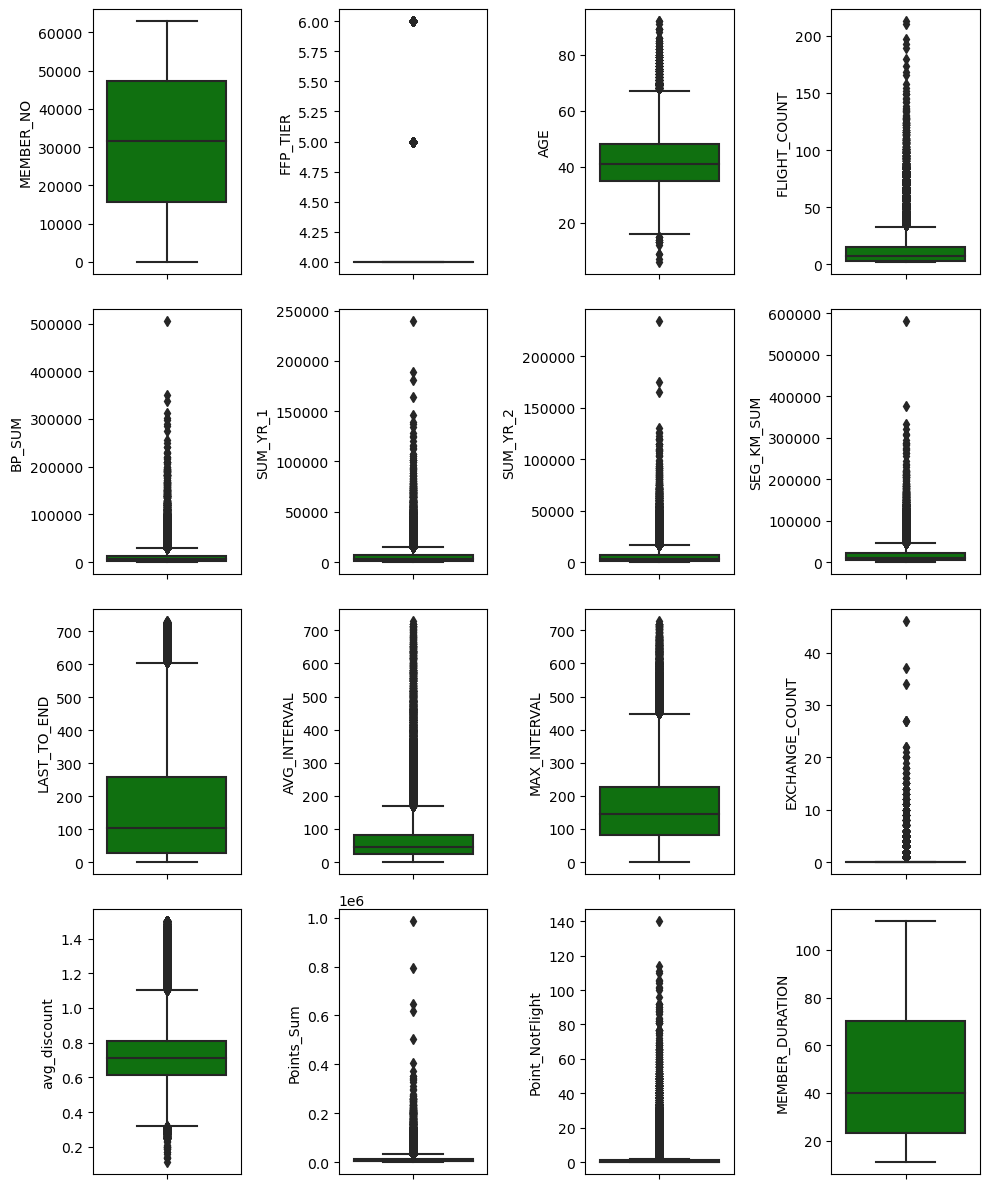

In [37]:
# Pengecekan distribusi dari fitur numerical menggunakan boxplot
plt.figure(figsize=(10,12))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df_clean[nums[i]], color='green', orient='v')
    plt.tight_layout()

**Mayoritas kolom memiliki outliers, kecuali kolom `MEMBER_NO`, `FFP_TIER`, `MEMBER_DURATION`**

### Distplot

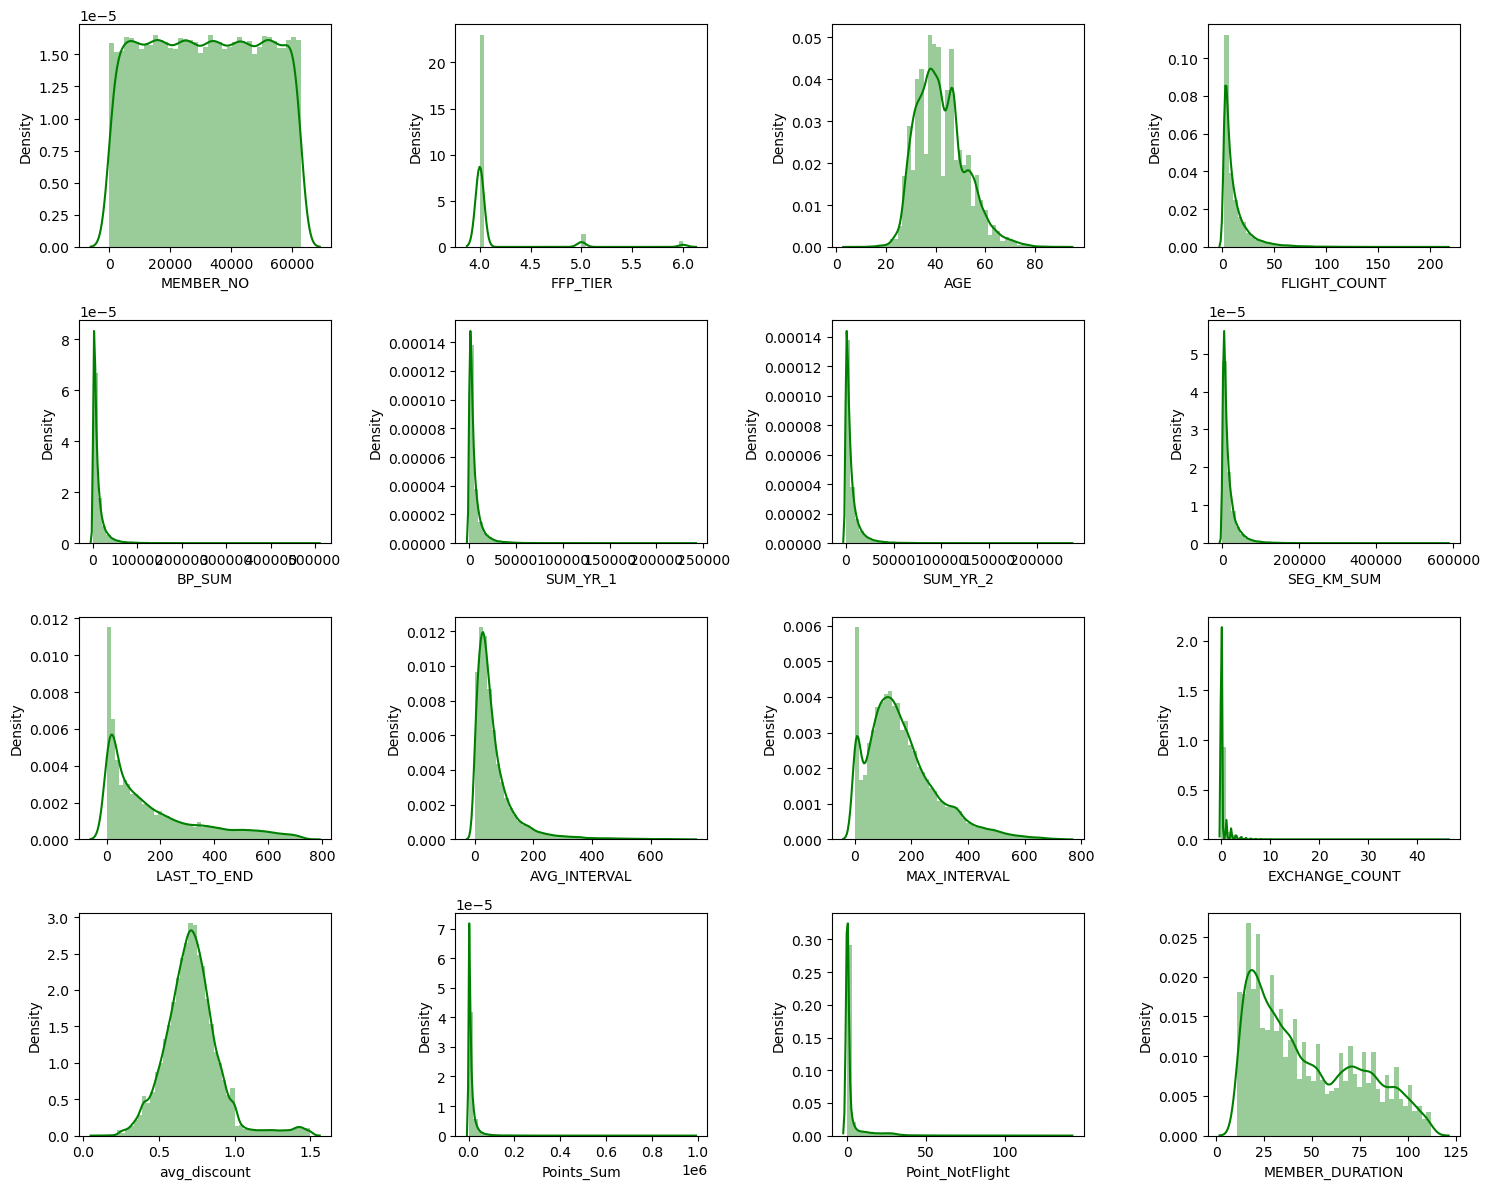

In [38]:
# Pengecekan distribusi dari fitur numerical dengan menggunakan distplot
plt.figure(figsize=(15, 12))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.distplot(df_clean[nums[i]], color='green', kde=True)
    plt.tight_layout()

- Pada kolom `AGE` distribusinya mendekati normal.
- Mayoritas kolom yang memiliki outliers distribusinya positively skewed, kecuali kolom `MEMBER_NO`, `FFP_TIER`, `avg_discount`.

### Countplot (categorical)

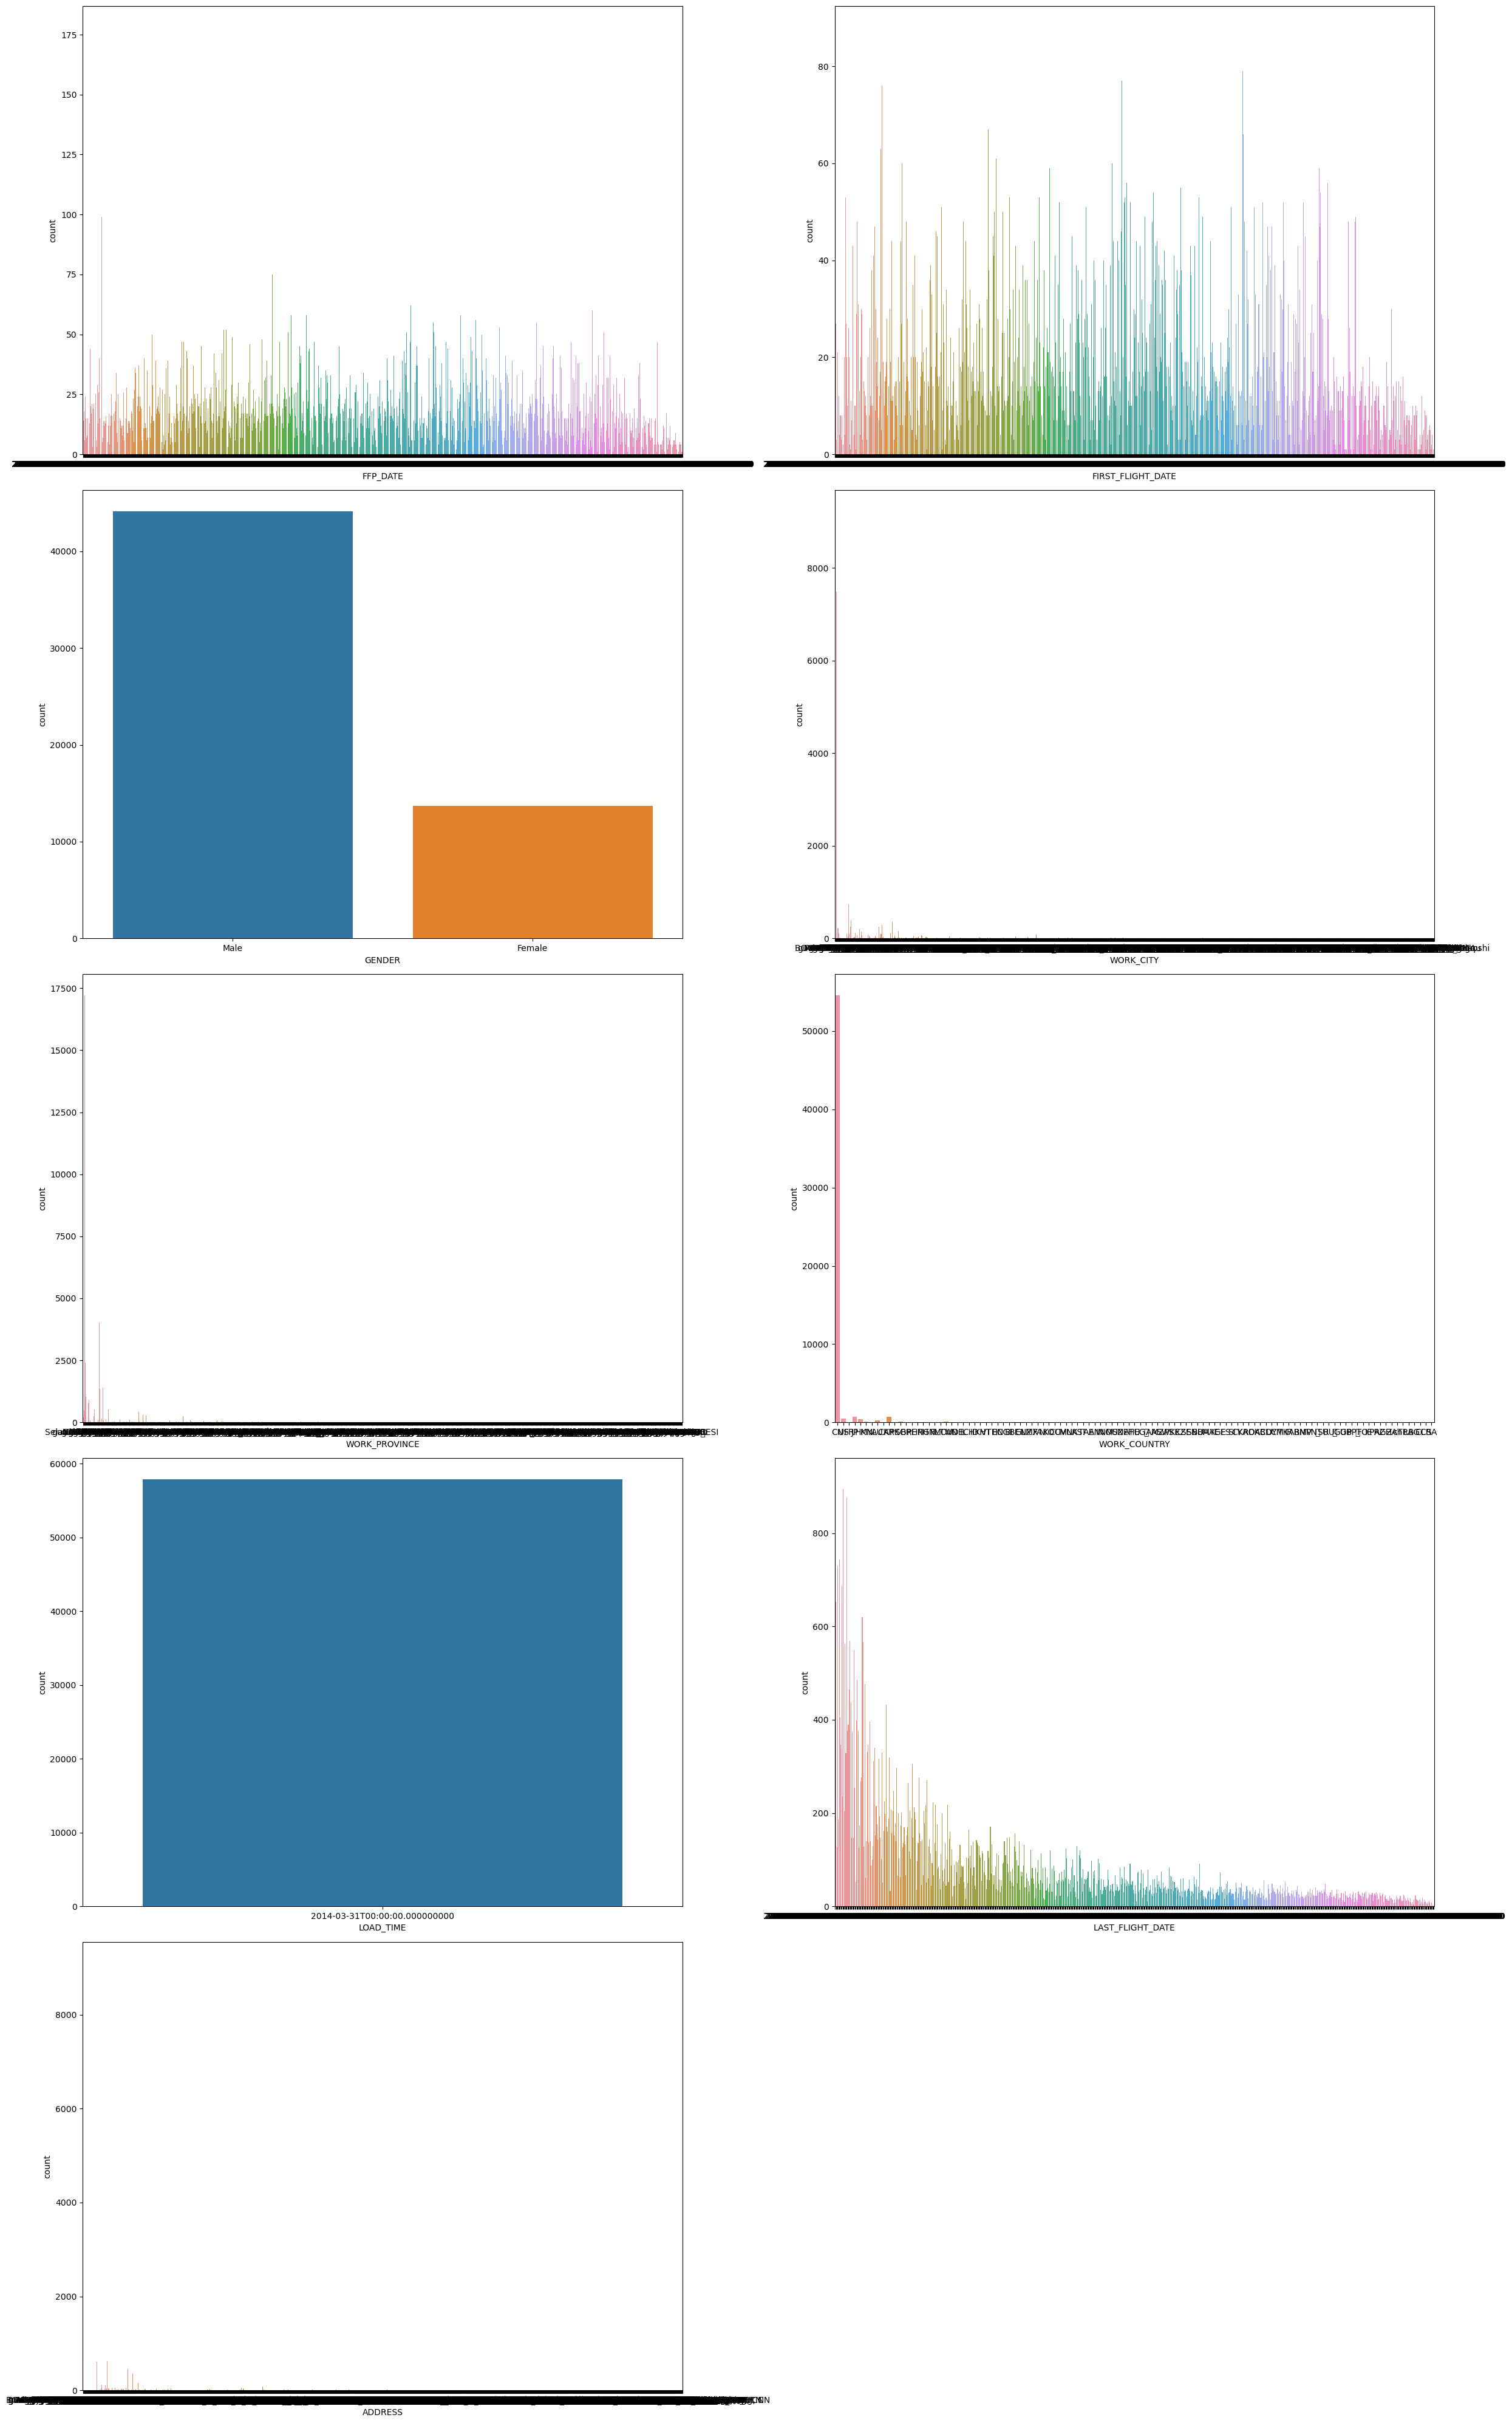

In [39]:
# Pengecekan distribusi dari fitur categorical menggunakan countplot
plt.figure(figsize=(25, 40))
for i in range(0, len(cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(df_clean[cats[i]])
    plt.tight_layout()

- Mayoritas customer adalah **Male**.
- Mayoritas kolom memiliki banyak nilai unique.
- Pada kolom `LOAD_TIME` hanya 1 value, yaitu tanggal **2014-03-31**.

## Multivariate Analysis

### Correlation Heatmap

<AxesSubplot:>

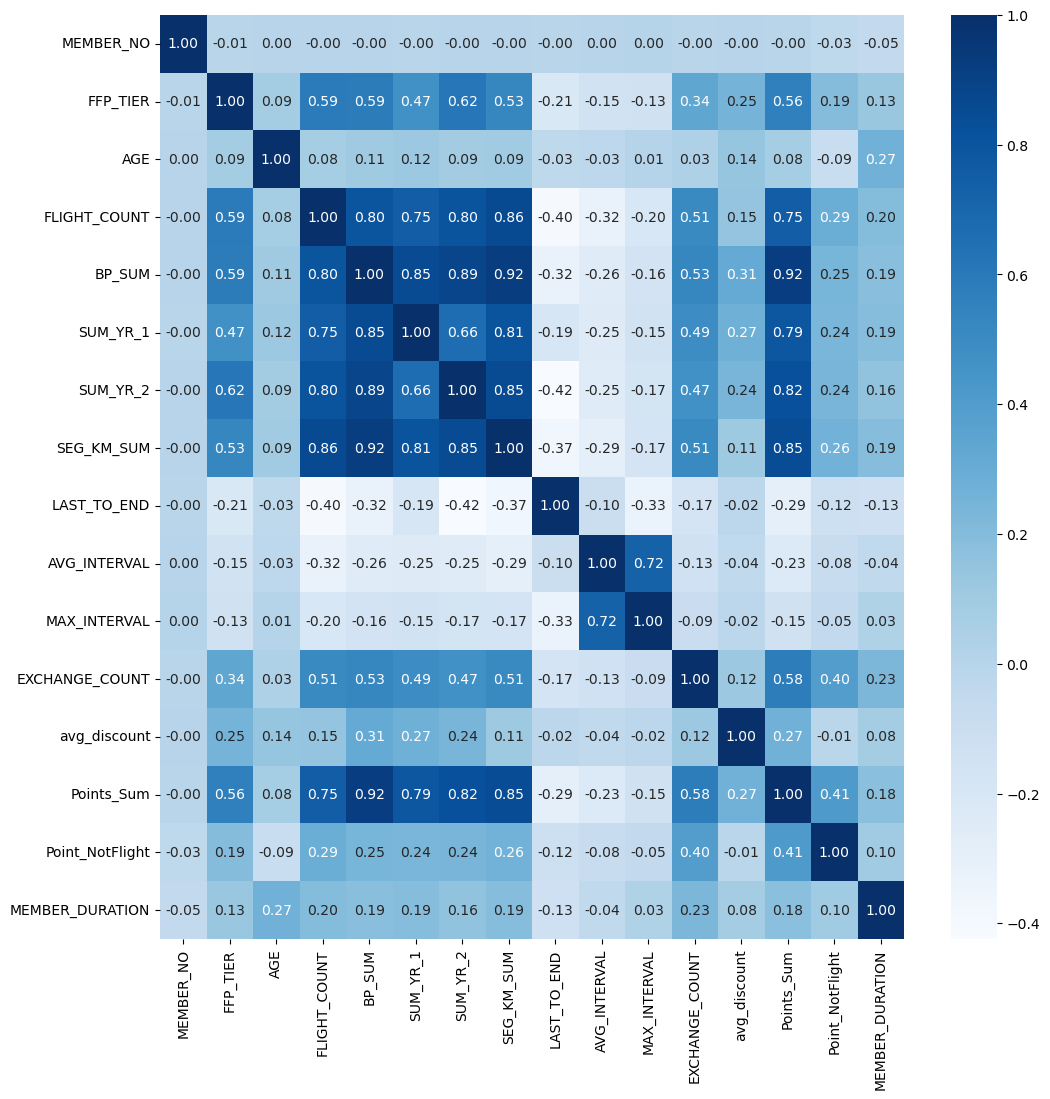

In [40]:
# Pengecekan korelasi antar feature dengan Correlation Heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df_clean.corr(), cmap='Blues', annot=True, fmt='.2f')

- Kolom `FFP_TIER` berkorelasi dengan kolom `FLIGHT_COUNT`, `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM`, `EXCHANGE_COUNT`, `avg_discount`, `Points_Sum`, `Point_NotFlight`, `MEMBER_DURATION`, dimana ketika customer melakukan perjalanan maka status keanggotaan akan meningkat.

### Feature Selection

In [41]:
df_fs = df_clean.copy()

In [42]:
df_fs = df_fs[['FLIGHT_COUNT', 'SEG_KM_SUM', 'LAST_TO_END' ,'avg_discount', 'MEMBER_DURATION']]

Dalam melakukan pemilihan feature kita menggunakan konsep RFM:
- Recency -> `LAST_TO_END`
- Frequency -> `FLIGHT_COUNT`
- Monetary -> `SEG_KM_SUM`

Dan ada beberapa kolom yang dianggap penting untuk menilai customer dalam bisnis penerbangan, yaitu:
- Loyalitas -> `MEMBER_DURATION`
- kabin -> `avg_discount`, faktor diskon terkait dengan kelas kabin mencerminkan tinggi dan rendahnya nilai pelanggan.

### Feature Transformation

Sebelum dilakukan clustering, data perlu distandarisasi/normalisasi agar setiap fitur memiliki skala yang sama. <br>
Pada kolom `FLIGHT_COUNT`, `SEG_KM_SUM`, `LAST_TO_END`, `MEMBER_DURATION` digunakan normalisasi, karena data memiliki distribusi positively skewed. <br>
Untuk kolom `AGE`, kita menggunakan standarisasi, karena distribusinya mendekati normal.

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# MinMaxScaler
df_fs['FLIGHT_COUNT_scale'] = MinMaxScaler().fit_transform(df_fs['FLIGHT_COUNT'].values.reshape(len(df_fs),1))
df_fs['SEG_KM_SUM_scale'] = MinMaxScaler().fit_transform(df_fs['SEG_KM_SUM'].values.reshape(len(df_fs),1))
df_fs['LAST_TO_END_scale'] = MinMaxScaler().fit_transform(df_fs['LAST_TO_END'].values.reshape(len(df_fs),1))
df_fs['MEMBER_DURATION_scale'] = MinMaxScaler().fit_transform(df_fs['MEMBER_DURATION'].values.reshape(len(df_fs),1))

# StandardScaler
df_fs['avg_discount_scale'] = StandardScaler().fit_transform(df_fs['avg_discount'].values.reshape(len(df_fs),1))

In [44]:
df_scale = df_fs.drop(['FLIGHT_COUNT', 'SEG_KM_SUM', 'LAST_TO_END' ,'avg_discount', 'MEMBER_DURATION'], axis=1)

In [45]:
df_scale.describe().T

,count,mean,std,min,25%,50%,75%,max
FLIGHT_COUNT_scale,57852.0,4.760317e-02,0.067489,0.000000,0.004739,0.023697,0.061611,1.000000
SEG_KM_SUM_scale,57852.0,2.922042e-02,0.036157,0.000000,0.007780,0.016956,0.036451,1.000000
LAST_TO_END_scale,57852.0,2.345057e-01,0.247675,0.000000,0.036986,0.142466,0.353425,1.000000
MEMBER_DURATION_scale,57852.0,3.612669e-01,0.273231,0.000000,0.118812,0.287129,0.584158,1.000000
avg_discount_scale,57852.0,1.676972e-15,1.000009,-3.311905,-0.591044,-0.050434,0.476915,4.240277


# Clustering (K-Means)

Mencari jumlah cluster yang ideal menggunakan **Elbow Method** dan **Silhouette Score**.

### Elbow Method

In [46]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scale)
    inertia.append(kmeans.inertia_)

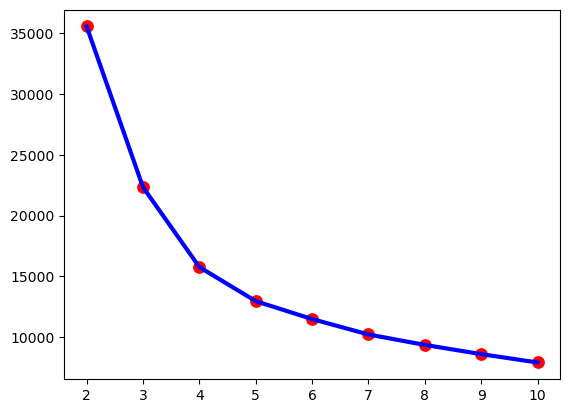

In [47]:
sns.lineplot(x=range(2, 11), y=inertia, color='blue', linewidth = 3)
sns.scatterplot(x=range(2, 11), y=inertia, s=100, color='red')
plt.show()

In [48]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    37.165974
1    29.394998
2    17.756237
3    11.349935
4    11.030245
5     8.370180
6     8.093697
7     7.961286
8          NaN
dtype: float64

### Silhouette Score

In [49]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
sil_score_euclidean = []
for c in range_n_clusters:
    kmeans = KMeans(n_clusters=c).fit(df_scale)
    prediction = kmeans.predict(df_scale)

    score_euclidean = silhouette_score(df_scale, prediction, metric='euclidean')
    sil_score_euclidean.append(score_euclidean)

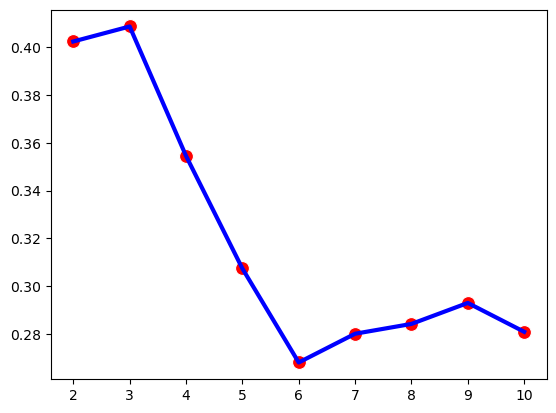

In [50]:
sns.lineplot(x=range(2, 11), y=sil_score_euclidean, color='blue', linewidth = 3)
sns.scatterplot(x=range(2, 11), y=sil_score_euclidean, s=100, color='red')
plt.show()

Dilihat dari evaluasi dengan menggunakan **Elbow Method** dan **Silhouette Score** diperoleh informasi jumlah cluster yang ideal adalah 3 cluster.

### Hasil Clustering

In [51]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(df_scale)
clusters = kmeans.labels_
df_clean['clusters'] = clusters

In [52]:
df_clean.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,ADDRESS,MEMBER_DURATION,clusters
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31,2014-03-31,210,505308,239560.0,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50,"., beijing, CN",88,1
1,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40,2014-03-31,135,351159,163618.0,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26,"., beijing, CN",85,2
2,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64,2014-03-31,23,337314,116350.0,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12,"Los Angeles, CA, US",67,2
3,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48,2014-03-31,152,273844,124560.0,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39,"guiyang, guizhou, CN",59,1
4,56972,2008-02-10,2009-09-29,Male,6,guangzhou,guangdong,CN,64,2014-03-31,92,313338,112364.0,76946.0,294585,2014-01-13,79,7.043956,52,10,0.967692,343121,15,"guangzhou, guangdong, CN",73,1


# PCA

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_scale)
Xpca = pca.transform(df_scale)

In [54]:
df_pca = pd.DataFrame(data = Xpca, columns = ['pc1', 'pc2'])

In [55]:
df_pca['clusters'] = clusters

In [56]:
df_pca.head()

,pc1,pc2,clusters
0,1.335145,0.547721,1
1,2.922521,0.423280,2
2,2.021137,0.189817,2
3,1.372389,0.248386,1
4,1.356132,0.299065,1


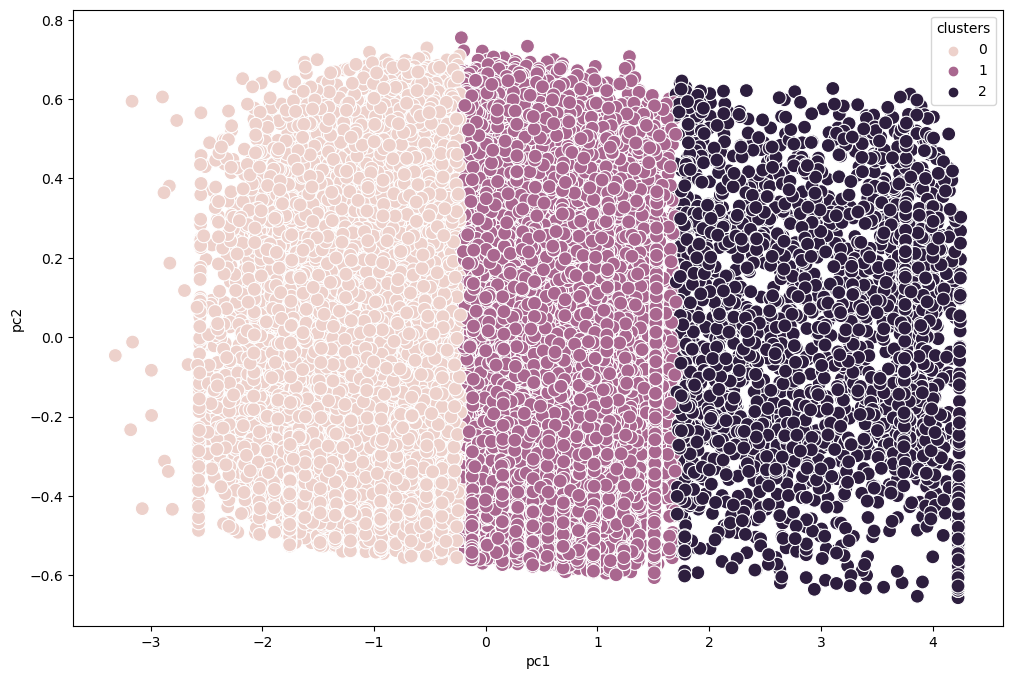

In [57]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x='pc1',
                y='pc2',
                hue='clusters',
                data=df_pca,
                s=100,
                ax=ax
               )

plt.show()

### Analisa Cluster

In [58]:
df_clean[['FLIGHT_COUNT', 'SEG_KM_SUM', 'LAST_TO_END', 'avg_discount', 'MEMBER_DURATION', 'clusters']].groupby('clusters').agg(['mean', 'median', 'std'])

FLIGHT_COUNT                      SEG_KM_SUM                         \
                 mean median        std          mean   median           std   
clusters                                                                       
0            9.539318    6.0  10.580752  14756.993237   9121.5  16631.905367   
1           13.581037    8.0  15.773723  18723.910678  10986.0  22816.699728   
2           16.675413    9.0  19.610000  24465.356750  13215.0  29492.350613   

         LAST_TO_END                    avg_discount                      \
                mean median         std         mean    median       std   
clusters                                                                   
0         178.290851  114.0  179.687235     0.565041  0.588567  0.093234   
1         169.442698  101.0  181.851762     0.796628  0.780136  0.083582   
2         147.542954   75.0  174.886314     1.271140  1.274819  0.145975   

         MEMBER_DURATION                    
                    mean median        std  
clusters                                    
0              45.502856   38.0  27.284626  
1              48.413787   41.0  27.546242  
2              55.073212   52.0  29.375091

In [59]:
df_clean['clusters'].value_counts().to_frame().reset_index().rename(columns={"index": "clusters", "clusters": "total_member"})

,clusters,total_member
0,1,31683
1,0,23806
2,2,2363


**clusters 0 (low value customer):**
- High-level flight recency
- Low-level flight frequency
- Jumlah anggota cluster menengah
- Maskapai perlu meningkatkan interaksi dengan pelanggan ini dan perlu mengambil strategi pemasaran tertentu untuk memperpanjang siklus pelanggan ini.

**clusters 1 (middle value customer):**
- Mid-level flight recency
- Mid-level flight frequency
- Jumlah anggota cluster terbanyak
- Sebagai pelanggan potensial, maskapai dapat mendorong pelanggan tersebut untuk meningkatkan transaksi.

**clusters 2 (high value customer):**
- Low-level flight recency
- High-level flight frequency
- Jumlah anggota cluster terendah
- Durasi keanggotaan terlama
- Tipe pelanggan paling ideal, pelanggan yang berkontribusi paling besar bagi maskapai. Maskapai perlu menyediakan perlakuan khusus untuk pelanggan ini dan meningkatkan kepuasan mereka.